In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
traindata = pd.read_csv('kdd_train.csv')
testdata = pd.read_csv('kdd_test.csv')

In [3]:
data = pd.concat([traindata,testdata])
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
categ = ['protocol_type','service','flag','labels']
# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)
#data[categ] = testdata[categ].apply(le.fit_transform)

In [5]:
X = data.iloc[:,1:42]
Y = data['labels']

In [6]:
scaler = Normalizer().fit(X)
X = scaler.transform(X)

In [7]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [8]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [9]:
model = Sequential()
model.add(GRU(128,input_shape=(40,1)))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(40))
model.add(Activation('softmax'))


In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [11]:
checkpointer = callbacks.ModelCheckpoint(filepath="results/cnn1results/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')

In [12]:

history=model.fit(X_train, Y_train, epochs=75,verbose=1,batch_size=500,validation_data=(X_test, Y_test),callbacks=[checkpointer])

Epoch 1/75
238/238 [==============================] - 29s 112ms/step - loss: 1.5054 - accuracy: 0.5217 - val_loss: 1.3235 - val_accuracy: 0.5315
Epoch 2/75
238/238 [==============================] - 27s 113ms/step - loss: 1.3346 - accuracy: 0.5282 - val_loss: 1.3113 - val_accuracy: 0.5315
Epoch 3/75
238/238 [==============================] - 27s 112ms/step - loss: 1.2037 - accuracy: 0.5974 - val_loss: 0.8622 - val_accuracy: 0.8153
Epoch 4/75
238/238 [==============================] - 27s 111ms/step - loss: 0.6965 - accuracy: 0.8188 - val_loss: 0.5356 - val_accuracy: 0.8559
Epoch 5/75
238/238 [==============================] - 26s 111ms/step - loss: 0.5334 - accuracy: 0.8558 - val_loss: 0.5091 - val_accuracy: 0.8676
Epoch 6/75
238/238 [==============================] - 26s 111ms/step - loss: 0.4875 - accuracy: 0.8643 - val_loss: 0.4512 - val_accuracy: 0.8757
Epoch 7/75
238/238 [==============================] - 27s 112ms/step - loss: 0.4521 - accuracy: 0.8775 - val_loss: 0.4171 - val_ac

Epoch 70/75
238/238 [==============================] - 26s 109ms/step - loss: 0.0658 - accuracy: 0.9825 - val_loss: 0.0632 - val_accuracy: 0.9818
Epoch 71/75
238/238 [==============================] - 26s 108ms/step - loss: 0.0664 - accuracy: 0.9820 - val_loss: 0.0621 - val_accuracy: 0.9827
Epoch 72/75
238/238 [==============================] - 26s 108ms/step - loss: 0.0643 - accuracy: 0.9827 - val_loss: 0.0606 - val_accuracy: 0.9835
Epoch 73/75
238/238 [==============================] - 26s 108ms/step - loss: 0.0630 - accuracy: 0.9828 - val_loss: 0.0617 - val_accuracy: 0.9829
Epoch 74/75
238/238 [==============================] - 26s 108ms/step - loss: 0.0628 - accuracy: 0.9826 - val_loss: 0.0592 - val_accuracy: 0.9836
Epoch 75/75
238/238 [==============================] - 26s 108ms/step - loss: 0.0644 - accuracy: 0.9823 - val_loss: 0.0625 - val_accuracy: 0.9835


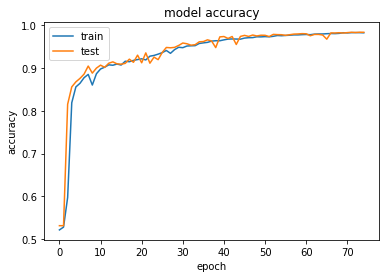

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

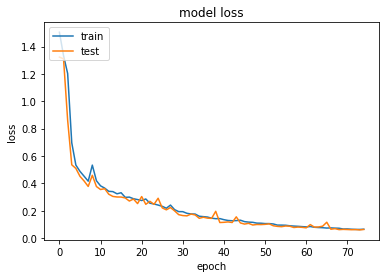

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.save("results/cnn1results/cnn_model.hdf5")